In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import metrics

import statsmodels.api as sm
from statsmodels.tools import eval_measures

In [2]:
properatti_df_bsas=pd.read_csv("./tp2_properati_no_input.csv", sep=",", encoding='utf-8')
properatti_df_bsas.sample(5)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
23932,88042,Flores,2147.058824,34.0,1.0,73000.0,73000.0,True,False,True,False,False,True,True,True,False,False,True
29393,113036,Parque Chacabuco,1956.521739,46.0,2.0,90000.0,90000.0,False,False,False,False,False,False,False,False,False,False,False
14024,54152,Chacarita,2846.535714,28.0,2.0,79703.0,79703.0,True,True,False,True,True,True,True,True,False,False,False
5808,24988,Flores,1140.350877,171.0,5.0,195000.0,195000.0,False,False,False,False,False,False,False,False,False,False,False
1756,8466,Villa Crespo,NaN,NaN,2.0,59650.0,59650.0,True,True,True,True,True,False,True,True,False,False,True


In [3]:
lista=[]
for col in properatti_df_bsas.columns:
    lista.append(col)
print(lista)

['Unnamed: 0', 'barrio', 'price_usd_per_m2', 'surface_total_clean', 'rooms_clean', 'precios_nuevos', 'precios_aprox_usd_clean', 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']


In [4]:
properatti_df_bsas=properatti_df_bsas*1
properatti_df_bsas.sample(5)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
15054,57924,Recoleta,3245.614035,114.0,3.0,370000.0,370000.0,1,0,0,0,0,0,1,0,0,0,0
21812,80820,Barrio Norte,1646.341463,164.0,4.0,270000.0,270000.0,0,0,0,0,0,0,0,0,0,0,0
29954,116363,Villa del Parque,NaN,NaN,4.0,400000.0,400000.0,1,1,0,0,1,0,1,0,0,0,1
1804,8932,Palermo,NaN,NaN,2.0,145000.0,145000.0,1,0,0,0,0,0,1,0,0,1,0
9581,37853,Flores,1029.498525,339.0,5.0,349000.0,349000.0,1,0,0,0,1,0,1,0,0,0,1


In [5]:
properatti_df_bsas.shape

(31942, 18)

In [6]:
properatti_df_bsas.isna().sum()

Unnamed: 0                    0
barrio                     1294
price_usd_per_m2           8819
surface_total_clean        3912
rooms_clean                5901
precios_nuevos             2899
precios_aprox_usd_clean    2899
amenities                     0
estacionamiento               0
sum                           0
pileta                        0
parrilla                      0
gimnasio                      0
lavadero                      0
solarium                      0
quincho                       0
baulera                       0
terraza                       0
dtype: int64

In [7]:
llenado_nulos=properatti_df_bsas[properatti_df_bsas["price_usd_per_m2"].isnull()]
llenado_nulos.sample(4)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
29943,116317,Flores,NaN,NaN,1.0,100000.0,100000.0,1,0,1,1,0,0,0,0,0,0,0
18850,72551,Tribunales,NaN,100.0,NaN,249000.0,249000.0,0,0,0,0,0,0,0,0,0,0,0
22851,85160,Almagro,NaN,132.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0
16441,62299,Belgrano,NaN,NaN,3.0,209185.0,209185.0,1,1,1,0,1,0,0,0,0,1,1


In [8]:
mask_precio=llenado_nulos[llenado_nulos["precios_nuevos"].notnull()]

In [9]:
mask_precio.head(4)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,precios_aprox_usd_clean,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
2,3,Liniers,NaN,NaN,3.0,95000.00000,95000.00,0,0,0,0,0,0,0,0,0,0,0
24,97,San Telmo,NaN,NaN,1.0,80693.70093,79851.93,0,1,0,0,0,0,0,0,0,0,0
30,120,Belgrano,NaN,NaN,3.0,178000.00000,178000.00,1,1,0,0,0,0,1,0,0,0,0
32,137,Colegiales,NaN,133.0,6.0,249000.00000,249000.00,1,0,0,0,0,0,0,0,0,0,1


In [10]:
mask_precio.shape

(5920, 18)

In [11]:
nonulos=mask_precio[mask_precio["surface_total_clean"].notnull()]
nonulos.isna().sum()

Unnamed: 0                    0
barrio                       33
price_usd_per_m2           2201
surface_total_clean           0
rooms_clean                 351
precios_nuevos                0
precios_aprox_usd_clean       0
amenities                     0
estacionamiento               0
sum                           0
pileta                        0
parrilla                      0
gimnasio                      0
lavadero                      0
solarium                      0
quincho                       0
baulera                       0
terraza                       0
dtype: int64

In [12]:
precio_n_por_m2=nonulos["precios_nuevos"]/nonulos["surface_total_clean"]
print(precio_n_por_m2.sample(4))
print(precio_n_por_m2.shape[0])

918      1475.000000
4191      148.148148
8894     2000.000000
28254    2144.927536
dtype: float64
2201


In [13]:
properatti_df_bsas["price_usd_per_m2"] = properatti_df_bsas["price_usd_per_m2"].fillna(precio_n_por_m2.iloc[:])

In [14]:
properatti_df_bsas.isna().sum()

Unnamed: 0                    0
barrio                     1294
price_usd_per_m2           6618
surface_total_clean        3912
rooms_clean                5901
precios_nuevos             2899
precios_aprox_usd_clean    2899
amenities                     0
estacionamiento               0
sum                           0
pileta                        0
parrilla                      0
gimnasio                      0
lavadero                      0
solarium                      0
quincho                       0
baulera                       0
terraza                       0
dtype: int64

In [15]:
properatti_df_bsas.iloc[15522,:]

Unnamed: 0                    59535
barrio                        Nunez
price_usd_per_m2                NaN
surface_total_clean             NaN
rooms_clean                     3.0
precios_nuevos             128000.0
precios_aprox_usd_clean    128000.0
amenities                         0
estacionamiento                   0
sum                               0
pileta                            0
parrilla                          0
gimnasio                          0
lavadero                          0
solarium                          0
quincho                           0
baulera                           0
terraza                           0
Name: 15522, dtype: object

In [16]:
#Se llenaron 5819 campos de la columna price_usd_per_m2
# se elimina la columna precios_aprox_usd_clean por encontrarse repetida
properatti_df_bsas=properatti_df_bsas.drop(labels='precios_aprox_usd_clean', axis=1)

In [17]:
properatti_df_bsas.sample(4)

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
1763,8509,Parque Chas,NaN,NaN,1.0,97900.0,1,1,0,0,1,0,1,1,0,0,0
2159,10081,Barrio Norte,2666.666667,90.0,4.0,240000.0,0,0,0,0,0,0,0,0,0,0,0
19904,74943,San Telmo,3145.833333,48.0,2.0,151000.0,0,0,0,0,0,0,0,0,0,0,0
12633,48903,Caballito,1942.221053,95.0,NaN,184511.0,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

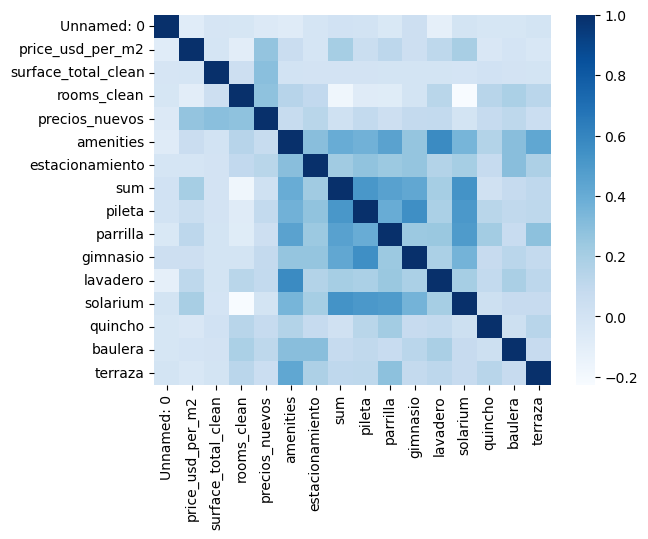

In [18]:
#Se busca alguna tendencia de correlacion para poder llenar las columnas faltantes
import seaborn as sns

correlation1=properatti_df_bsas.select_dtypes("number").corr()
sns.heatmap(correlation1, cmap="Blues")

In [19]:
print(correlation1.price_usd_per_m2)

Unnamed: 0            -0.084241
price_usd_per_m2       1.000000
surface_total_clean   -0.014022
rooms_clean           -0.096318
precios_nuevos         0.265895
amenities              0.058916
estacionamiento       -0.012220
sum                    0.201134
pileta                 0.056289
parrilla               0.116410
gimnasio               0.040058
lavadero               0.110827
solarium               0.197661
quincho               -0.035323
baulera               -0.006090
terraza               -0.031595
Name: price_usd_per_m2, dtype: float64


In [20]:
print(correlation1.precios_nuevos)


Unnamed: 0            -0.057351
price_usd_per_m2       0.265895
surface_total_clean    0.291480
rooms_clean            0.277779
precios_nuevos         1.000000
amenities              0.071491
estacionamiento        0.131545
sum                    0.027701
pileta                 0.093850
parrilla               0.039300
gimnasio               0.086107
lavadero               0.092133
solarium              -0.003342
quincho                0.080883
baulera                0.110101
terraza                0.047250
Name: precios_nuevos, dtype: float64


In [21]:
print(correlation1.surface_total_clean)

Unnamed: 0            -0.018334
price_usd_per_m2      -0.014022
surface_total_clean    1.000000
rooms_clean            0.041144
precios_nuevos         0.291480
amenities              0.005622
estacionamiento        0.001009
sum                    0.001545
pileta                 0.002010
parrilla              -0.002100
gimnasio              -0.002546
lavadero              -0.000703
solarium              -0.009678
quincho                0.012897
baulera                0.000815
terraza               -0.000830
Name: surface_total_clean, dtype: float64


In [22]:
print(properatti_df_bsas.shape)
print(properatti_df_bsas.isna().sum())


(31942, 17)
Unnamed: 0                0
barrio                 1294
price_usd_per_m2       6618
surface_total_clean    3912
rooms_clean            5901
precios_nuevos         2899
amenities                 0
estacionamiento           0
sum                       0
pileta                    0
parrilla                  0
gimnasio                  0
lavadero                  0
solarium                  0
quincho                   0
baulera                   0
terraza                   0
dtype: int64


In [23]:
#Una vez ya terminada de limpiar la columna price-USD_per_m2 se procede a evaluar los métodos de regresión lineal múltiple

In [24]:
#sacamos los nulos para poder realizar las regresiones lineales
#Primero evaluo la cantidad de nulos que quedan si se toma solo los valores no nulos de price por m2
properatti_no_nulos=properatti_df_bsas[properatti_df_bsas["price_usd_per_m2"].notnull()]
properatti_no_nulos.sample(2)
properatti_no_nulos.isnull().sum()
properatti_no_nulos=properatti_no_nulos[properatti_no_nulos["barrio"].notnull()]
properatti_no_nulos.isnull().sum()
properatti_no_nulos=properatti_no_nulos[properatti_no_nulos["rooms_clean"].notnull()]
properatti_no_nulos.isnull().sum()
properatti_no_nulos.shape

(20830, 17)

In [25]:
#Regresión lineal múltiple simple
feature_cols=["surface_total_clean", "rooms_clean", "precios_nuevos"]
X=properatti_no_nulos[feature_cols]
y=properatti_no_nulos.price_usd_per_m2
linreg=LinearRegression()
linreg.fit(X,y)
y_pred=linreg.predict(X)
print(linreg.coef_)
print(linreg.intercept_)
print(linreg.score(X,y))




[-1.86107303e+00 -8.12862243e+02  7.86627592e-03]
3612.028223020835
0.30100087473036685


In [26]:
list(zip(feature_cols, linreg.coef_))

[('surface_total_clean', -1.8610730273776381),
 ('rooms_clean', -812.8622431419069),
 ('precios_nuevos', 0.007866275924101123)]

In [27]:
#Separamos el dataset en datos de entrenamiento y datos de testeo y aplicamos el modelo

def train_test_error(feature_cols):
    X = properatti_no_nulos[feature_cols]
    y = properatti_no_nulos.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    

    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [28]:
train_test_error(["surface_total_clean", "rooms_clean", "precios_nuevos"])

['surface_total_clean', 'rooms_clean', 'precios_nuevos']
MAE: 1318.4624978790866
MSE: 10396345.210673314
RMSE: 3224.3363984971097
R2: 0.2496453729060727



In [29]:
#Que ocurre si a este modelo le agregamos los amenities
train_test_error(["surface_total_clean", "rooms_clean", "precios_nuevos", 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza'])


['surface_total_clean', 'rooms_clean', 'precios_nuevos', 'amenities', 'estacionamiento', 'sum', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1422.5935684452675
MSE: 9137046.815836566
RMSE: 3022.7548388575224
R2: 0.3405350421417206



In [30]:
#Se observa que el no hay correlación


In [31]:
properatti_df_bsas

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza
0,0,Mataderos,1127.272727,55.0,2.0,62000.0,1,0,0,0,0,0,1,0,0,0,0
1,2,Mataderos,1309.090909,55.0,2.0,72000.0,1,0,0,0,0,0,1,0,0,0,0
2,3,Liniers,NaN,NaN,3.0,95000.0,0,0,0,0,0,0,0,0,0,0,0
3,7,Belgrano,3066.666667,45.0,1.0,138000.0,1,0,0,1,0,0,1,1,0,0,0
4,8,Belgrano,3000.000000,65.0,2.0,195000.0,1,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31937,121160,Belgrano,2611.464968,157.0,NaN,410000.0,1,0,0,0,0,0,1,0,0,1,0
31938,121209,Belgrano,2611.464968,157.0,NaN,410000.0,1,0,0,0,0,0,1,0,0,1,0
31939,121215,Belgrano,7699.115044,113.0,3.0,870000.0,1,1,1,1,1,0,0,0,1,0,1
31940,121217,Villa Urquiza,2858.695652,46.0,1.0,131500.0,1,1,0,0,1,0,1,1,0,0,1


In [32]:
# Filtrado de nulls en filas con valores numericos. 
# Me quedo solo con las filas que tengan las tres columnas numericas con valores no nulos

numericos = ["surface_total_clean", "rooms_clean", "precios_nuevos" ]
no_numericos = ["estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]

mask = properatti_df_bsas.notna().all(axis=1)

properatti_no_nulls = properatti_df_bsas[mask]

print(properatti_no_nulls.shape)


(20830, 17)


In [33]:
# Normalizo usando preprocessing.scale
# metodo scale

scaler = StandardScaler()

normalized_values = scaler.fit_transform(properatti_no_nulls[numericos])

# Creo nuevas columnas
normalized_columns = [f"{col}_normalized" for col in numericos]

# Las lleno con valores normalizados
properatti_no_nulls[normalized_columns] = normalized_values

properatti_no_nulls

C:\Users\inesh\AppData\Local\Temp\ipykernel_26656\3804696940.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properatti_no_nulls[normalized_columns] = normalized_values
C:\Users\inesh\AppData\Local\Temp\ipykernel_26656\3804696940.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properatti_no_nulls[normalized_columns] = normalized_values
C:\Users\inesh\AppData\Local\Temp\ipykernel_26656\3804696940.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,Unnamed: 0,barrio,price_usd_per_m2,surface_total_clean,rooms_clean,precios_nuevos,amenities,estacionamiento,sum,pileta,parrilla,gimnasio,lavadero,solarium,quincho,baulera,terraza,surface_total_clean_normalized,rooms_clean_normalized,precios_nuevos_normalized
0,0,Mataderos,1127.272727,55.0,2.0,62000.0,1,0,0,0,0,0,1,0,0,0,0,-0.035269,-0.426815,-0.415623
1,2,Mataderos,1309.090909,55.0,2.0,72000.0,1,0,0,0,0,0,1,0,0,0,0,-0.035269,-0.426815,-0.393181
3,7,Belgrano,3066.666667,45.0,1.0,138000.0,1,0,0,1,0,0,1,1,0,0,0,-0.042422,-1.088758,-0.245066
4,8,Belgrano,3000.000000,65.0,2.0,195000.0,1,0,0,1,0,0,1,1,0,0,0,-0.028115,-0.426815,-0.117148
5,13,Palermo,2234.000000,50.0,1.0,111700.0,1,0,1,1,0,1,0,1,0,0,1,-0.038846,-1.088758,-0.304088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31926,121138,Saavedra,3014.492754,69.0,2.0,208000.0,1,0,1,1,1,1,1,0,1,0,1,-0.025254,-0.426815,-0.087973
31934,121153,Barrio Norte,1813.186813,91.0,3.0,165000.0,1,0,1,0,1,0,1,0,0,0,1,-0.009516,0.235128,-0.184473
31936,121158,Recoleta,3750.000000,44.0,1.0,165000.0,1,0,0,0,1,0,1,1,0,0,0,-0.043138,-1.088758,-0.184473
31939,121215,Belgrano,7699.115044,113.0,3.0,870000.0,1,1,1,1,1,0,0,0,1,0,1,0.006221,0.235128,1.397672


In [34]:
# Regresion con nuevos datos normalizados 

def train_test_error(feature_cols):
    X = properatti_no_nulls[feature_cols]
    y = properatti_no_nulls.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=230)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [35]:
# Regresion con todos los features
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
print(train_test_error(features))
print

['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1463.7562441820357
MSE: 15472040.374667102
RMSE: 3933.451458282802
R2: 0.3403976512346417

None


<function print>

In [36]:
# Regresion con los features numericos
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized"]
train_test_error(features)

['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized']
MAE: 1324.6264437266555
MSE: 16565518.001616722
RMSE: 4070.0759208664304
R2: 0.2937806315273196



In [37]:
#Regresión Lasso

In [38]:
def train_test_error_lasso(feature_cols):
    X = properatti_no_nulls[feature_cols]
    y = properatti_no_nulls.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=340)
    lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 25], cv=5)
    
    lm_lasso.fit(X_train, y_train)
    y_pred = lm_lasso.predict(X_test)
    print("Alpha :", lm_lasso.alpha_)
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [39]:
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_lasso(features)

Alpha : 25.0
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1323.838738460565
MSE: 10924891.118477475
RMSE: 3305.2823054131813
R2: 0.3975778844520894



In [40]:
numericos = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized"]
train_test_error_lasso(numericos)

Alpha : 25.0
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized']
MAE: 1263.4587205301484
MSE: 11997569.40225574
RMSE: 3463.7507708055064
R2: 0.33842808478744424



In [41]:
#Regresión Ridge



In [42]:
def train_test_error_ridge(feature_cols):
    X = properatti_no_nulls[feature_cols]
    y = properatti_no_nulls.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=233)
    lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 25])
    
    lm_ridge.fit(X_train, y_train)
    y_pred = lm_ridge.predict(X_test)
    
    print("Alpha :", lm_ridge.alpha_)
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()
    return 

In [43]:
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_ridge(features)

Alpha : 25.0
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 1431.7475943963739
MSE: 13970291.068676353
RMSE: 3737.685255432345
R2: 0.36978861674719



In [44]:
#Regresion Ridge. Sólo campos númericos. Es decir, sin amenities

In [45]:
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized"]
train_test_error_ridge(features)

Alpha : 25.0
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized']
MAE: 1310.759705359373
MSE: 15248907.449715083
RMSE: 3904.984948718123
R2: 0.3121091744089519



In [46]:

#Filtro por el barrio con mayor cantidad de campos no nulos

barrios_con_mas_propiedades=properatti_no_nulls.groupby(by="barrio",sort=True).size()
barrios_con_mas_propiedades.sort_values(ascending=False).head(5)

barrio
Palermo          2592
Belgrano         1823
Caballito        1598
Villa Urquiza    1115
Recoleta         1068
dtype: int64

In [47]:
#El barrio con mayor propiedades es Palermo. Filtro el dataframe de acuerdo a ese barrio

In [48]:
palermo=properatti_no_nulls["barrio"]=="Palermo"
properatti_palermo=properatti_no_nulls[palermo]
properatti_palermo.shape

(2592, 20)

In [49]:
#Palermo tiene 2592 campos no nulos
#Se realiza una regresión Lineal Múltiple sobre el df Palermo
def train_test_error_palermo(feature_cols):
    X = properatti_palermo[feature_cols]
    y = properatti_palermo.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8972)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()

    #definimos los residuales para graficar
    residuales = y_test - y_pred

    #graficamos el histograma de residuales
    plt.figure(figsize=(10, 6))
    plt.hist(residuales, bins=30, edgecolor='black')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.title('Histograma de Residuales')
    plt.xlabel('Residuales')
    plt.ylabel('Frecuencia')
    plt.show()

    #graficamos el scatter de residuales
    plt.figure(figsize=(10, 6))
    plt.scatter(np.arange(len(residuales)), residuales)
    plt.axhline(y=0, color='r')
    plt.title('Scatter de Residuales')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Residuales')
    plt.show()
    return 

['surface_total_clean', 'rooms_clean', 'precios_nuevos']
MAE: 613.1237505541801
MSE: 638408.8985656138
RMSE: 799.0049427666977
R2: 0.3749285417277898



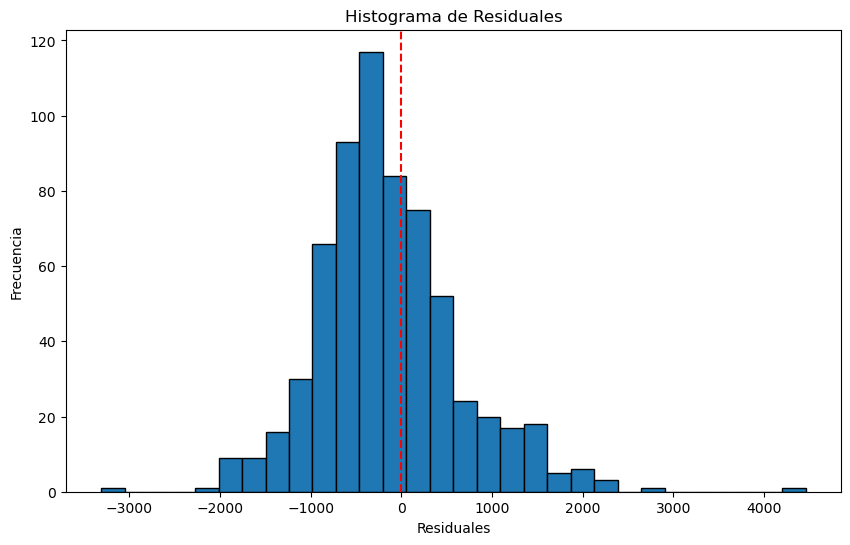

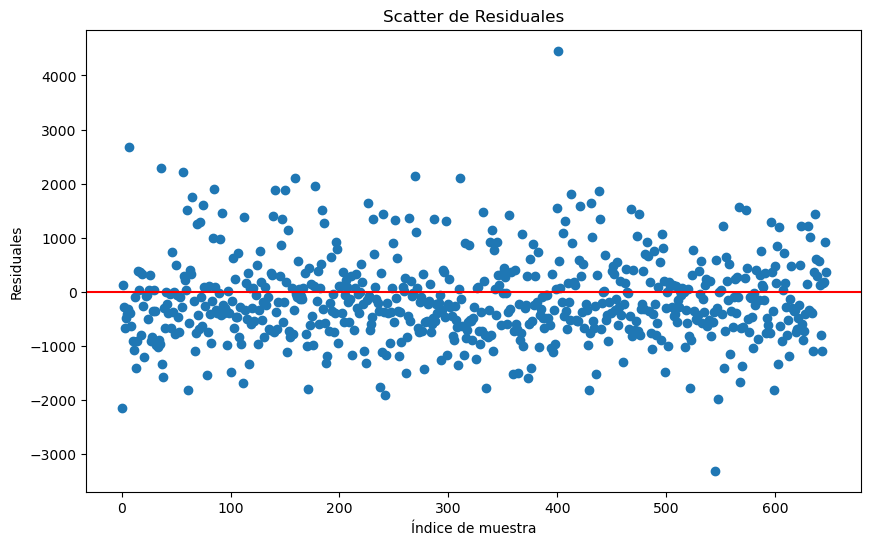

In [50]:
#Pruebo sin amenities
train_test_error_palermo(["surface_total_clean", "rooms_clean", "precios_nuevos"])

['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 568.2401011371852
MSE: 557177.9602577324
RMSE: 746.4435412392102
R2: 0.4544624285188569



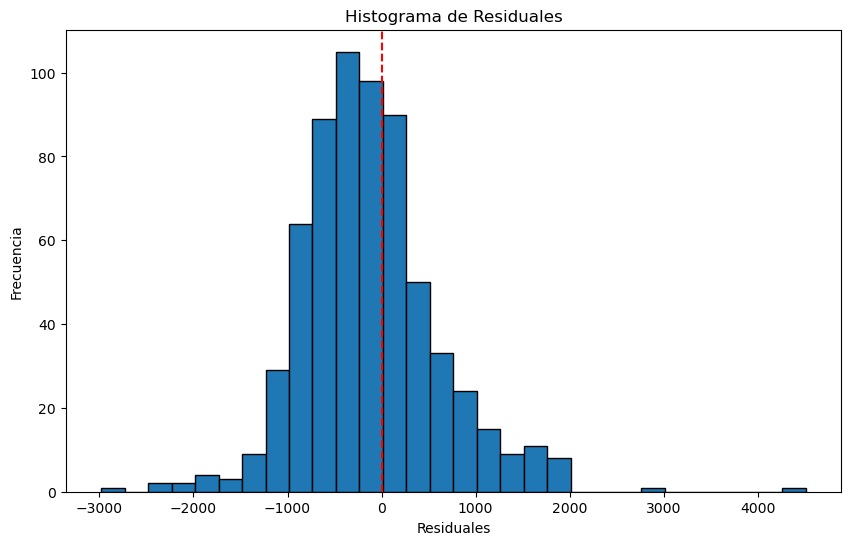

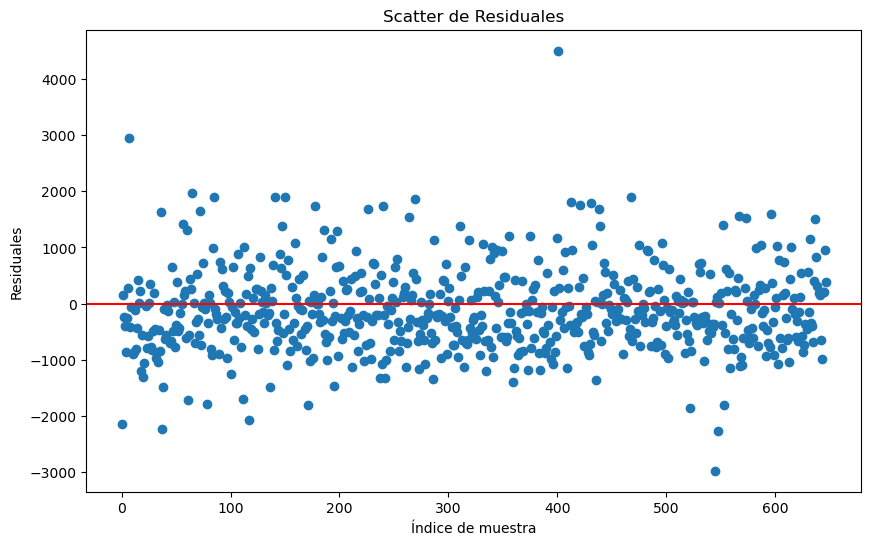

In [51]:
#Pruebo los valores con amenities
features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_palermo(features)

In [52]:
def train_test_error_lasso_palermo(feature_cols):
    X = properatti_palermo[feature_cols]
    y = properatti_palermo.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8972)
    lm_lasso = linear_model.LassoCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 25], cv=5)
    
    lm_lasso.fit(X_train, y_train)
    y_pred = lm_lasso.predict(X_test)
    
    print("Alpha :", lm_lasso.alpha_)
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()

    #definimos los residuales para graficar
    residuales = y_test - y_pred

    #graficamos el histograma de residuales
    plt.figure(figsize=(10, 6))
    plt.hist(residuales, bins=30, edgecolor='black')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.title('Histograma de Residuales Lasso')
    plt.xlabel('Residuales')
    plt.ylabel('Frecuencia')
    plt.show()

    #graficamos el scatter de residuales
    plt.figure(figsize=(10, 6))
    plt.scatter(np.arange(len(residuales)), residuales)
    plt.axhline(y=0, color='r')
    plt.title('Scatter de Residuales Lasso')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Residuales')
    plt.show()
    return 

Alpha : 15.0
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 585.764564505829
MSE: 605787.74406985
RMSE: 778.3236756451971
R2: 0.4068681852023778



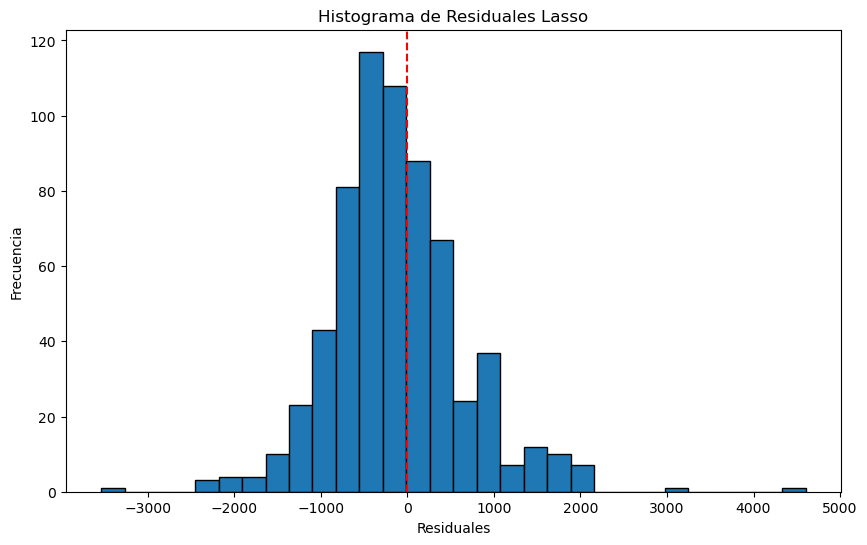

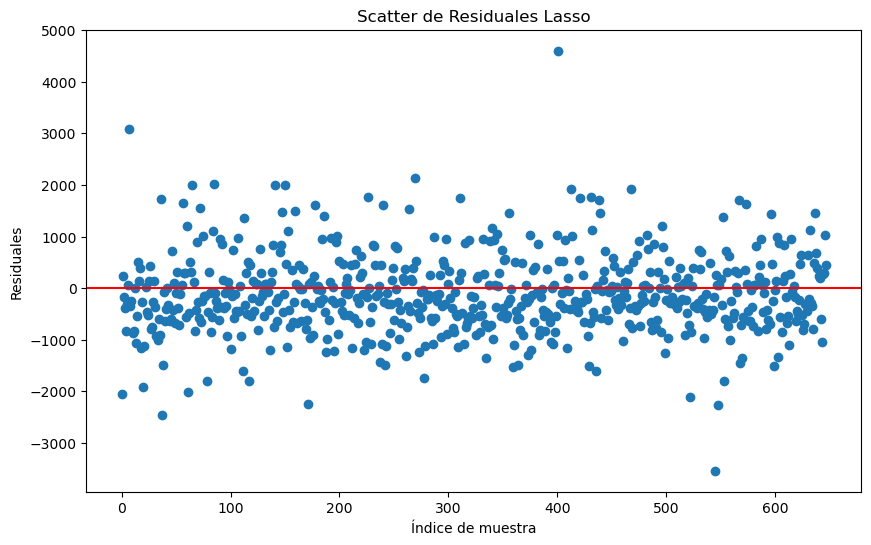

In [53]:
#Pruebo con los valores normalizados con amenities

features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_lasso_palermo(features)

Alpha : 15.0
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized']
MAE: 631.4181182647972
MSE: 688029.3873225232
RMSE: 829.475368725632
R2: 0.3263447088001017



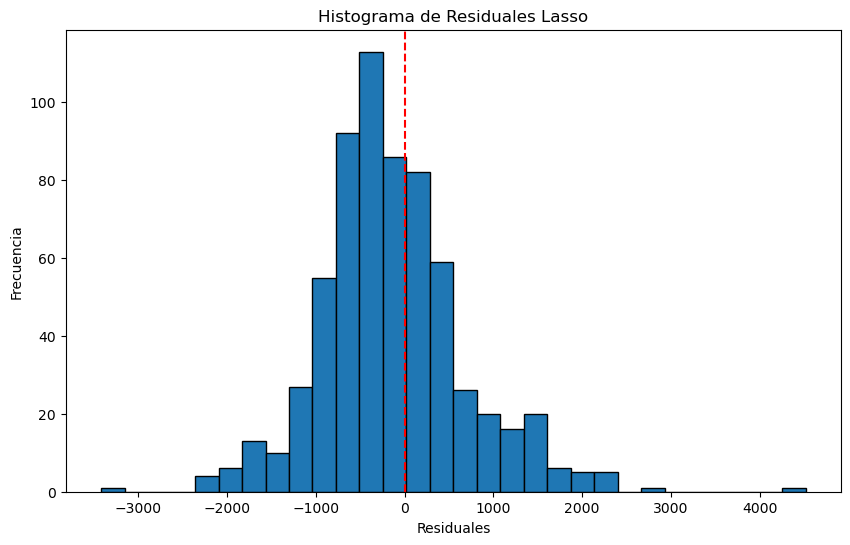

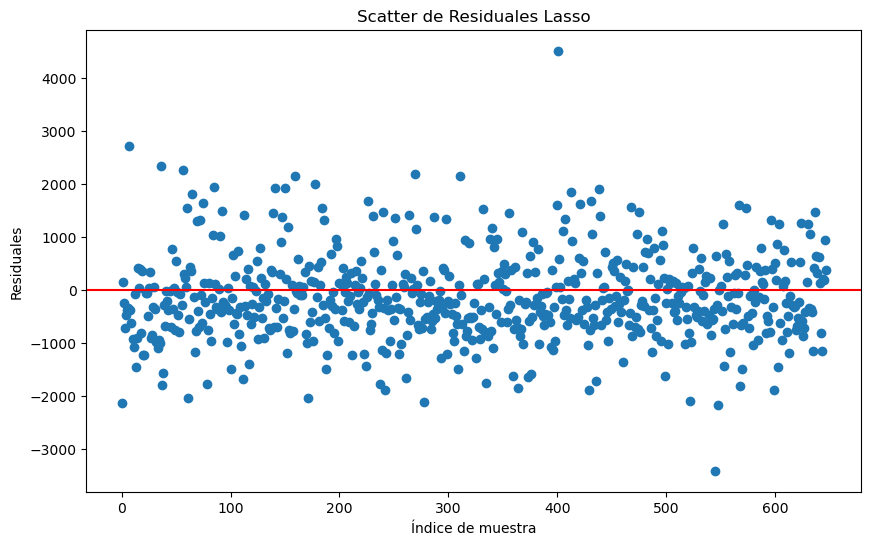

In [54]:
#Pruebo con los valores normalizados sin amenities

features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized"]
train_test_error_lasso_palermo(features)

In [55]:
#HAgo la regresión lineal con Ridge
def train_test_error_ridge_palermo(feature_cols):
    X = properatti_palermo[feature_cols]
    y = properatti_palermo.price_usd_per_m2

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8972)
    lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10, 15, 25])
    
    lm_ridge.fit(X_train, y_train)
    y_pred = lm_ridge.predict(X_test)
    print("Alpha :", lm_ridge.alpha_)
    
    print (feature_cols)
    print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    print ()

    #definimos los residuales para graficar
    residuales = y_test - y_pred

    #graficamos el histograma de residuales
    plt.figure(figsize=(10, 6))
    plt.hist(residuales, bins=30, edgecolor='black')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.title('Histograma de Residuales Ridge')
    plt.xlabel('Residuales')
    plt.ylabel('Frecuencia')
    plt.show()

    #graficamos el scatter de residuales
    plt.figure(figsize=(10, 6))
    plt.scatter(np.arange(len(residuales)), residuales)
    plt.axhline(y=0, color='r')
    plt.title('Scatter de Residuales Ridge')
    plt.xlabel('Índice de muestra')
    plt.ylabel('Residuales')
    plt.show()
    return 

Alpha : 10.0
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized', 'estacionamiento', 'sum', 'amenities', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'solarium', 'quincho', 'baulera', 'terraza']
MAE: 585.8553948588482
MSE: 602687.1677600192
RMSE: 776.3292908038568
R2: 0.4099039852355928



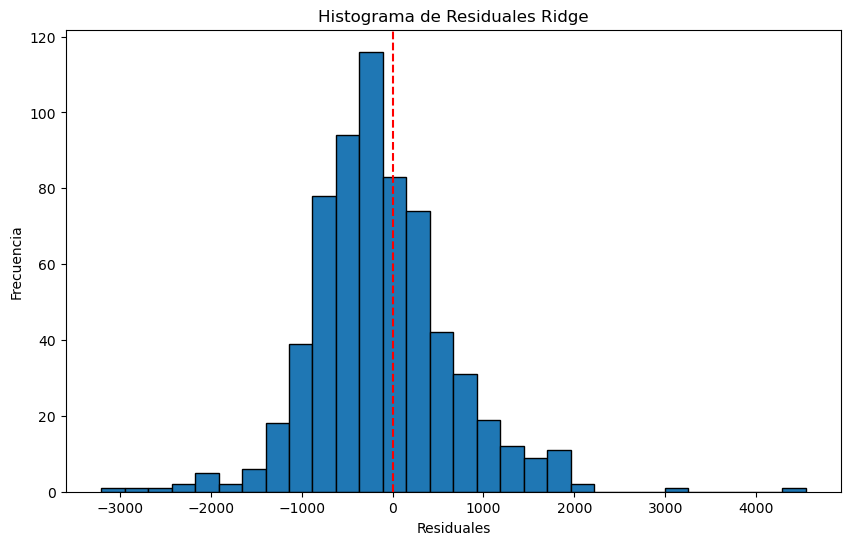

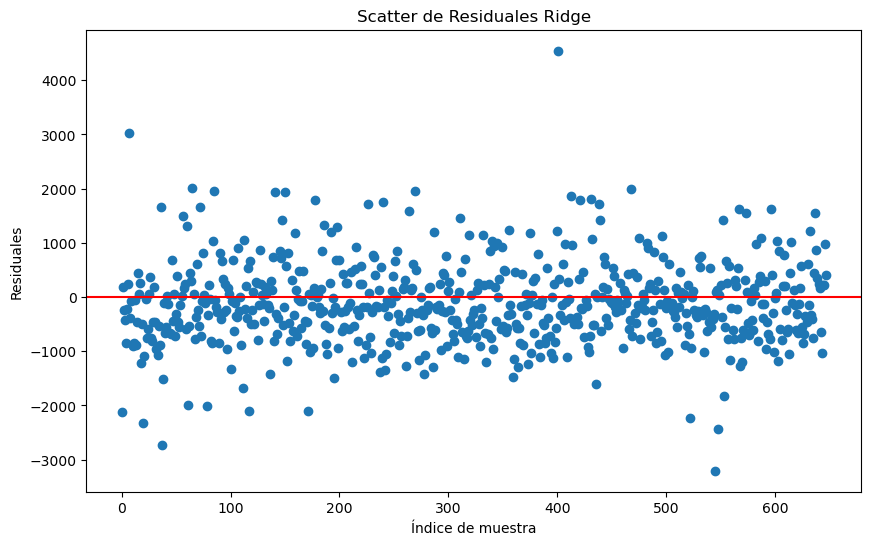

In [56]:
#Pruebo con los valores normalizados con amenities

features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized", "estacionamiento", "sum", "amenities", "pileta", "parrilla", "gimnasio", "lavadero", "solarium", "quincho", "baulera", "terraza"]
train_test_error_ridge_palermo(features)

Alpha : 10.0
['surface_total_clean_normalized', 'rooms_clean_normalized', 'precios_nuevos_normalized']
MAE: 630.7833776246841
MSE: 688810.4684827707
RMSE: 829.9460635985755
R2: 0.3255799457446965



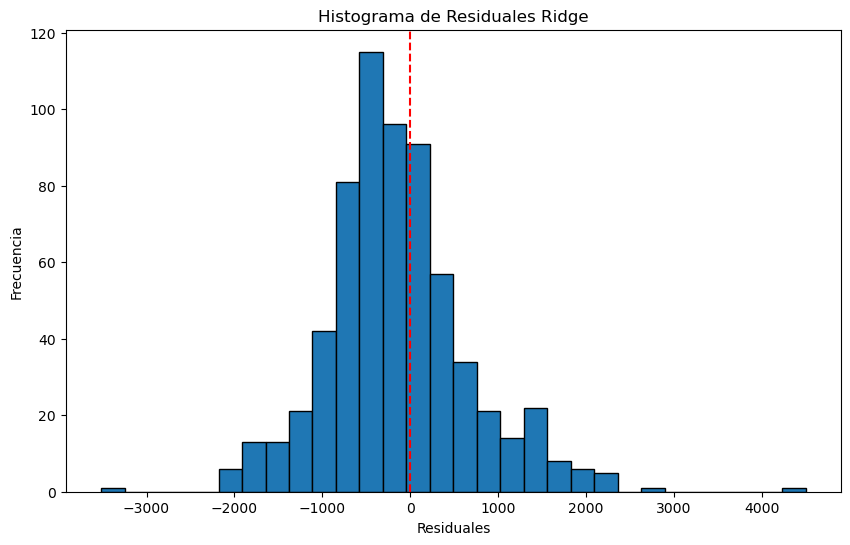

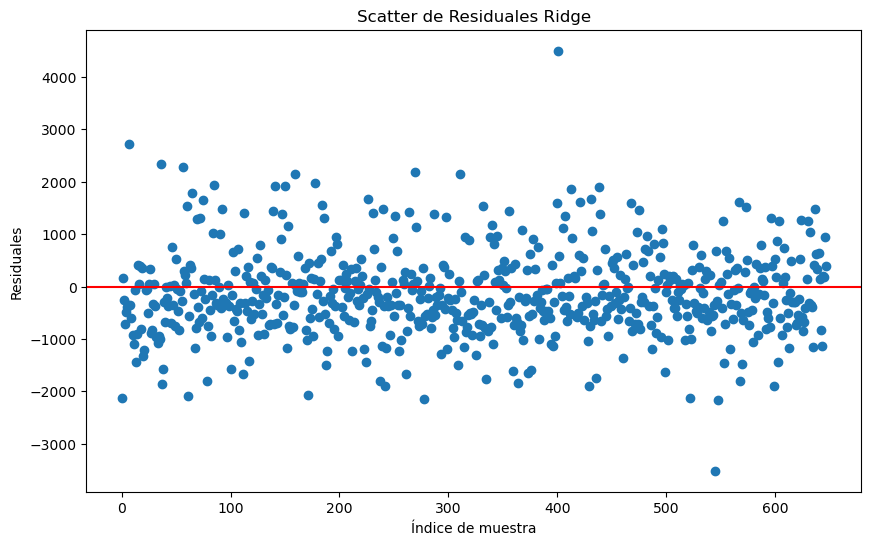

In [57]:
#Pruebo con los valores normalizados sin amenities

features = ["surface_total_clean_normalized", "rooms_clean_normalized", "precios_nuevos_normalized"]
train_test_error_ridge_palermo(features)